Naman Raiyani

60009220057

D2-1

IPCV Exp 9

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
image_path = '/content/drive/MyDrive/Colab Notebooks/IPCV/2.jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [ ]:
from collections import deque
def region_growing(img, seed, threshold):
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    binary_image = np.zeros(img.shape, dtype=np.uint8)

    x, y = seed
    mean_intensity = img[x, y]

    region = deque([(x, y)])
    visited = set()

    while region:
        current_pixel = region.popleft()
        cx, cy = current_pixel

        if (cx, cy) in visited:
            continue

        visited.add((cx, cy))
        binary_image[cx, cy] = 255

        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = cx + dx, cy + dy

            if 0 <= nx < img.shape[0] and 0 <= ny < img.shape[1]:
                if (nx, ny) not in visited and abs(int(img[nx, ny]) - mean_intensity) <= threshold:
                    region.append((nx, ny))

    return binary_image

In [ ]:
def display_two_images(original, modified, title1, title2):
    plt.figure(figsize=(10, 6))

    plt.subplot(1, 2, 1)
    plt.title(title1)
    plt.imshow(original, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(title2)
    plt.imshow(modified, cmap='gray')
    plt.axis('off')

    plt.show()

In [ ]:
img.shape

(225, 225)

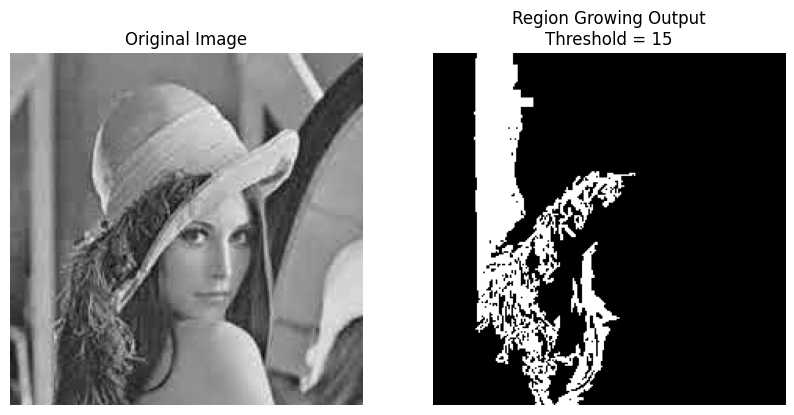

In [ ]:
seed_pixel = (100, 100)
threshold_value = 15
region_growing_output = region_growing(img, seed_pixel, threshold_value)

display_two_images(img, region_growing_output, 'Original Image', 'Region Growing Output\nThreshold = 15')

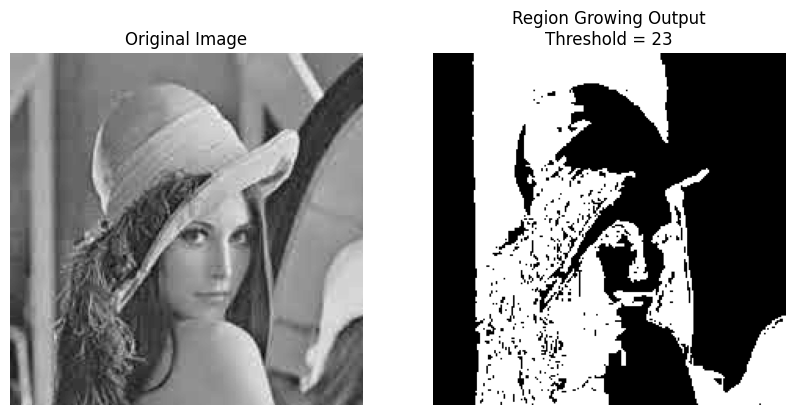

In [ ]:
seed_pixel = (100, 100)
threshold_value = 23
region_growing_output = region_growing(img, seed_pixel, threshold_value)

display_two_images(img, region_growing_output, 'Original Image', 'Region Growing Output\nThreshold = 23')

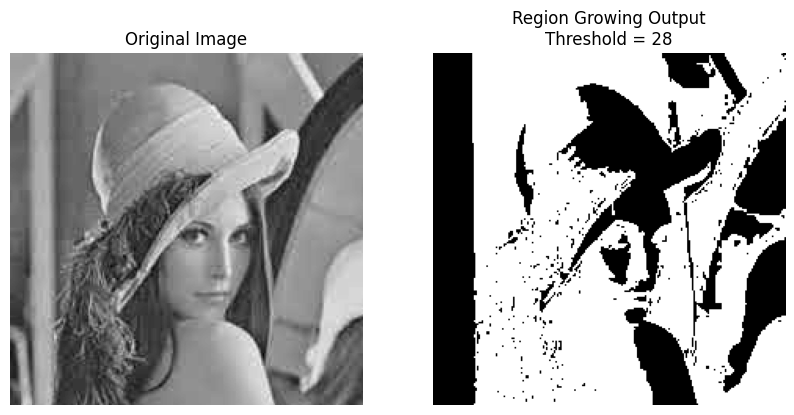

In [ ]:
seed_pixel = (100, 100)
threshold_value = 28
region_growing_output = region_growing(img, seed_pixel, threshold_value)

display_two_images(img, region_growing_output, 'Original Image', 'Region Growing Output\nThreshold = 28')

In [ ]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
random_index = np.random.randint(0, x_test.shape[0])
fashion_image = x_test[random_index]

In [ ]:
fashion_image.shape

(28, 28)

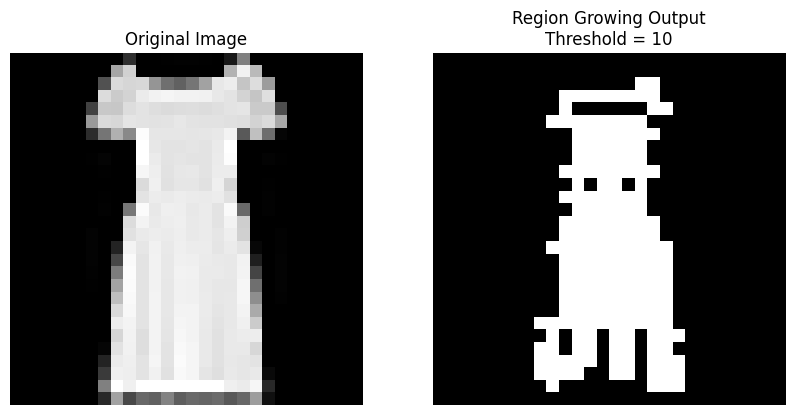

In [ ]:
seed_pixel = (15, 15)
threshold_value = 10
region_growing_output2 = region_growing(fashion_image, seed_pixel, threshold_value)

display_two_images(fashion_image, region_growing_output2, 'Original Image', 'Region Growing Output\nThreshold = 10')

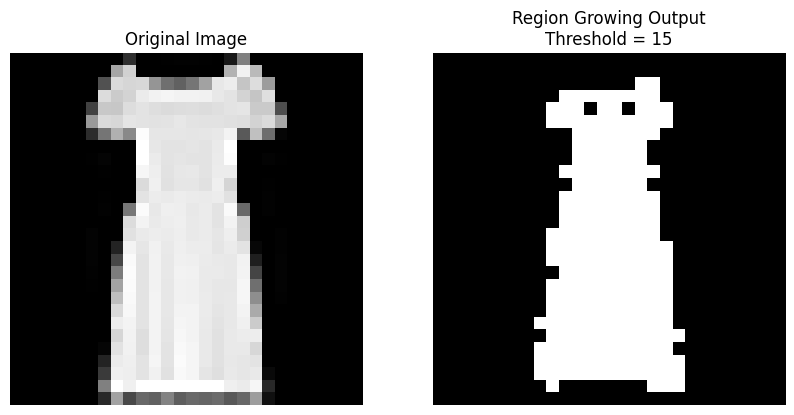

In [ ]:
seed_pixel = (15, 15)
threshold_value = 15
region_growing_output2 = region_growing(fashion_image, seed_pixel, threshold_value)

display_two_images(fashion_image, region_growing_output2, 'Original Image', 'Region Growing Output\nThreshold = 15')

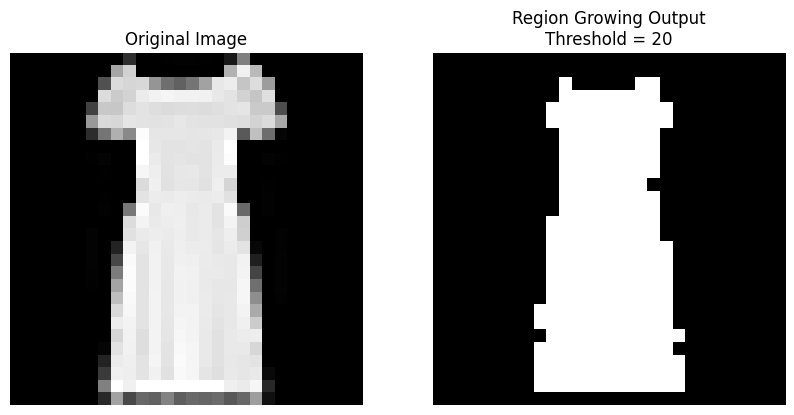

In [ ]:
seed_pixel = (15, 15)
threshold_value = 20
region_growing_output2 = region_growing(fashion_image, seed_pixel, threshold_value)

display_two_images(fashion_image, region_growing_output2, 'Original Image', 'Region Growing Output\nThreshold = 20')

In [ ]:
def region_split_merge(image, intensity_threshold):
    def recursive_divide_merge(sub_region):
        height, width = sub_region.shape[:2]

        if height <= 2 or width <= 2:
            return sub_region

        if len(sub_region.shape) == 2:
            if np.max(sub_region) - np.min(sub_region) <= intensity_threshold:
                return np.full(sub_region.shape, 128, dtype=np.uint8)
        else:
            if np.max(sub_region) - np.min(sub_region) <= intensity_threshold:
                return np.full(sub_region.shape, 128, dtype=np.uint8)

        mid_height, mid_width = height // 2, width // 2
        top_left_part = recursive_divide_merge(sub_region[:mid_height, :mid_width])
        top_right_part = recursive_divide_merge(sub_region[:mid_height, mid_width:])
        bottom_left_part = recursive_divide_merge(sub_region[mid_height:, :mid_width])
        bottom_right_part = recursive_divide_merge(sub_region[mid_height:, mid_width:])

        if len(sub_region.shape) == 2:
            return np.vstack((np.hstack((top_left_part, top_right_part)),
                              np.hstack((bottom_left_part, bottom_right_part))))
        else:
            return np.concatenate((np.hstack((top_left_part, top_right_part)),
                                   np.hstack((bottom_left_part, bottom_right_part))), axis=0)

    return recursive_divide_merge(image)

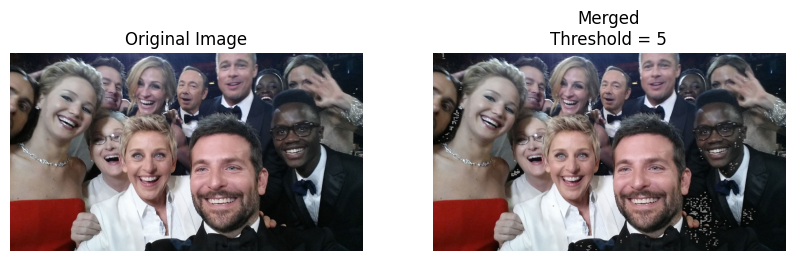

In [ ]:
threshold_value = 5

merged_image = region_split_merge(img, threshold_value)
display_two_images(img, merged_image, 'Original Image', 'Merged\nThreshold = 5')

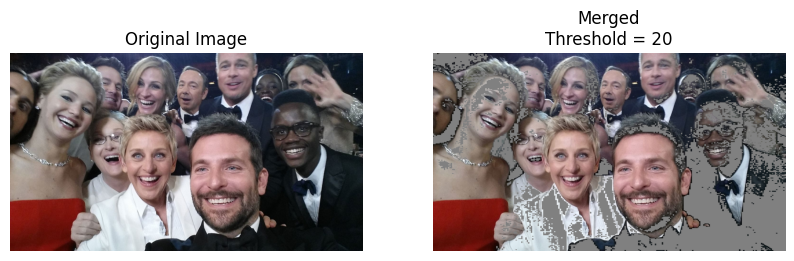

In [ ]:
threshold_value = 20

merged_image = region_split_merge(img, threshold_value)
display_two_images(img, merged_image, 'Original Image', 'Merged\nThreshold = 20')

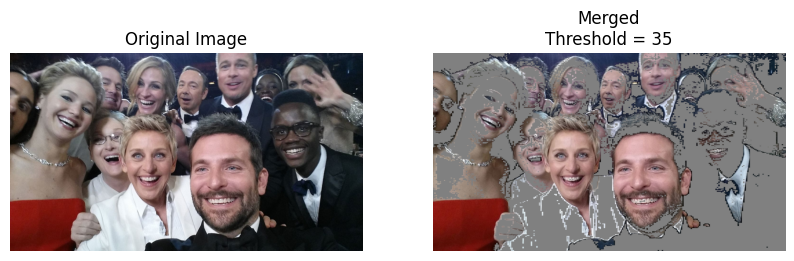

In [ ]:
threshold_value = 35

merged_image = region_split_merge(img, threshold_value)
display_two_images(img, merged_image, 'Original Image', 'Merged\nThreshold = 35')

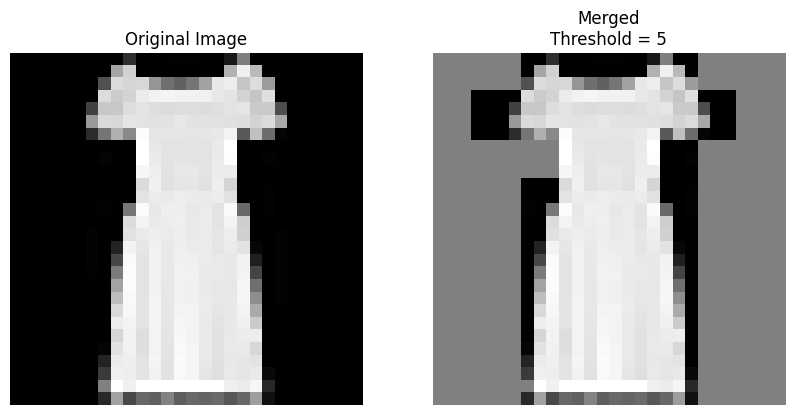

In [ ]:
threshold_value = 5

merged_image = region_split_merge(fashion_image, threshold_value)
display_two_images(fashion_image, merged_image, 'Original Image', 'Merged\nThreshold = 5')

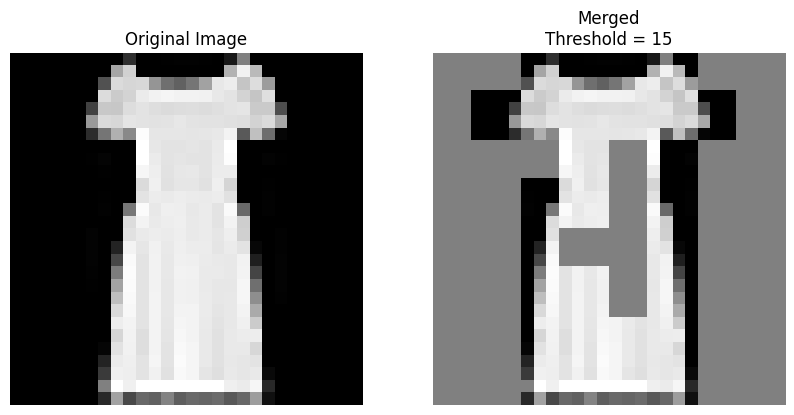

In [ ]:
threshold_value = 15

merged_image = region_split_merge(fashion_image, threshold_value)
display_two_images(fashion_image, merged_image, 'Original Image', 'Merged\nThreshold = 15')

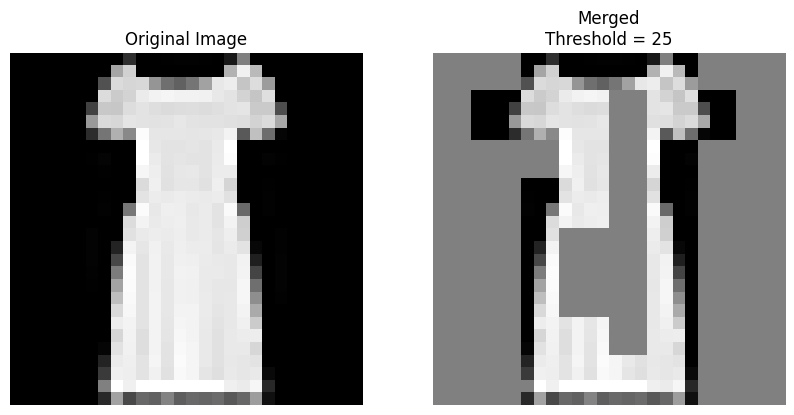

In [ ]:
threshold_value = 25

merged_image = region_split_merge(fashion_image, threshold_value)
display_two_images(fashion_image, merged_image, 'Original Image', 'Merged\nThreshold = 25')

In [ ]:
image_path = '/content/drive/MyDrive/Colab Notebooks/IPCV/14.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
img.shape

(833, 1480, 3)

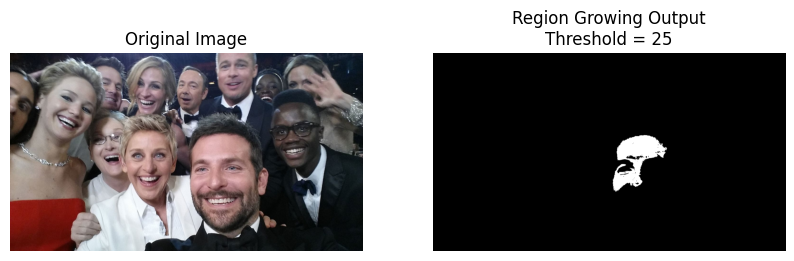

In [ ]:
seed_pixel = (400, 800)
threshold_value = 25
region_growing_output_colored = region_growing(img, seed_pixel, threshold_value)

display_two_images(img, region_growing_output_colored, 'Original Image', 'Region Growing Output\nThreshold = 25')

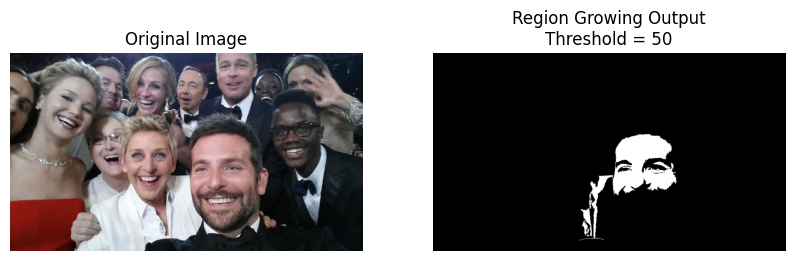

In [ ]:
seed_pixel = (400, 800)
threshold_value = 50
region_growing_output_colored = region_growing(img, seed_pixel, threshold_value)

display_two_images(img, region_growing_output_colored, 'Original Image', 'Region Growing Output\nThreshold = 50')

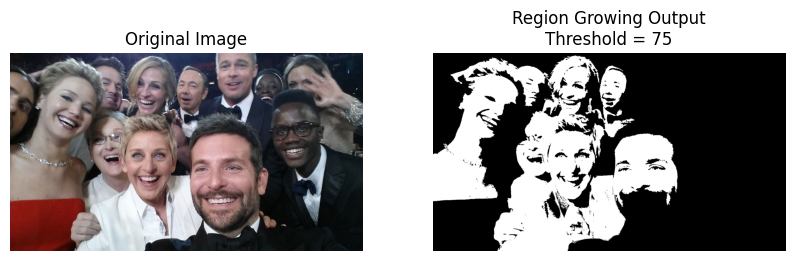

In [ ]:
seed_pixel = (400, 800)
threshold_value = 75
region_growing_output_colored = region_growing(img, seed_pixel, threshold_value)

display_two_images(img, region_growing_output_colored, 'Original Image', 'Region Growing Output\nThreshold = 75')

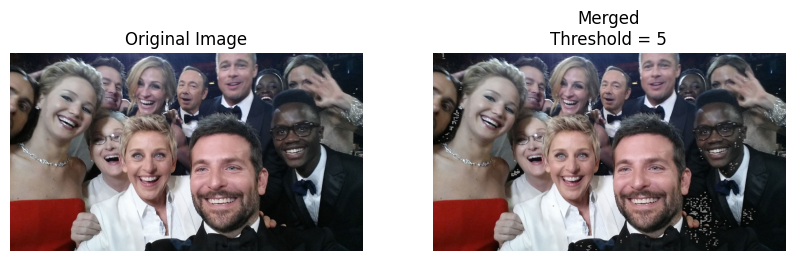

In [ ]:
threshold_value = 5

merged_image = region_split_merge(img, threshold_value)

display_two_images(img, merged_image, 'Original Image', 'Merged\nThreshold = 5')

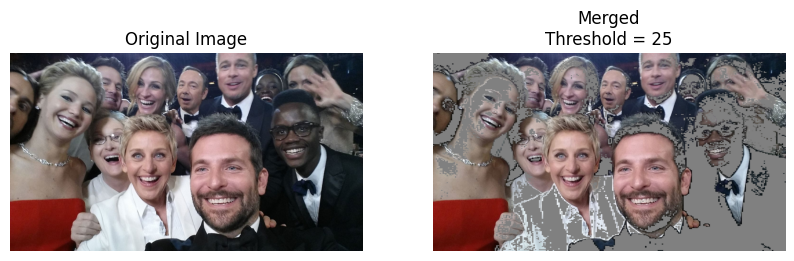

In [ ]:
threshold_value = 25

merged_image = region_split_merge(img, threshold_value)

display_two_images(img, merged_image, 'Original Image', 'Merged\nThreshold = 25')

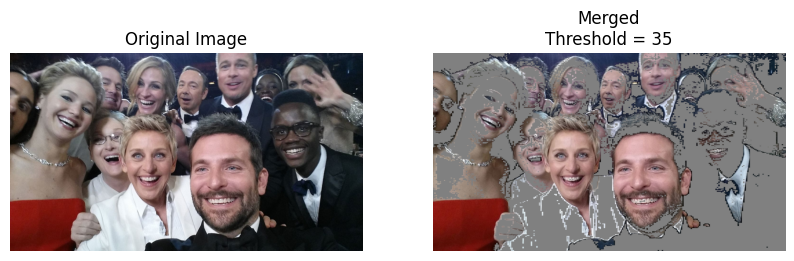

In [ ]:
threshold_value = 35

merged_image = region_split_merge(img, threshold_value)

display_two_images(img, merged_image, 'Original Image', 'Merged\nThreshold = 35')

### Observations

**Region Growing:**
- The `region_growing` function employs a segmentation technique that expands a region from a seed pixel based on pixel intensity differences.
- It takes an image, a seed pixel, and a threshold as inputs, creating a binary output where pixels in the region are marked white (255).

**Threshold Impact on Region Growing:**
- The `threshold` parameter affects how sensitive the algorithm is. A lower threshold results in smaller, more localized regions, while a higher threshold encompasses larger areas by allowing more pixel intensity variation.

**Region Split and Merge:**
- The `region_split_merge` function uses a recursive approach to segment an image by splitting it into smaller regions and merging them based on intensity differences.
- An `intensity_threshold` determines when regions merge; if the intensity difference within a region is below this threshold, the regions are combined.

### Parameter Understanding

- **Threshold (in both methods):** This parameter controls how similar pixel intensities must be for them to be included in the same segmented region.
  - In **Region Growing**, a lower threshold means only pixels with closely matching intensities are grouped, resulting in smaller regions. A higher threshold allows more variation, leading to larger regions.
  - In **Region Split and Merge**, a lower threshold leads to more splits and smaller regions, while a higher threshold results in fewer splits and potentially larger merged regions.

### Applications of Region Growing and Split-Merge Segmentation

1. **Medical Imaging:**
   - Used for tumor detection and organ segmentation in MRI and CT scans, aiding diagnosis and treatment planning.

2. **Remote Sensing:**
   - Classifies land cover types in satellite imagery and assesses vegetation health, supporting environmental monitoring.

3. **Computer Vision:**
   - Facilitates object recognition and image editing by segmenting similar pixel areas for extraction or manipulation.

4. **Industrial Inspection:**
   - Identifies defects in manufactured products and supports quality control by analyzing surface images.

5. **Agriculture:**
   - Monitors crop health and analyzes soil conditions using remote sensing images for precision agriculture.

6. **Autonomous Vehicles:**
   - Helps in scene understanding by processing images to identify objects and enhance navigation.

7. **Image Compression:**
   - Improves efficiency in image storage and transmission by segmenting regions of similar intensity.

#Conclusion

In conclusion, region growing and split-merge segmentation are powerful techniques in image analysis, offering valuable applications across diverse fields such as medical imaging, remote sensing, and autonomous systems. By adjusting sensitivity through threshold parameters, these methods enable precise segmentation, enhancing object detection and classification. Their versatility continues to drive advancements in technology and research.